In [1]:
'''
This was the mnist competition in class, my team placed 2nd overall
There are better ways to do run mnist, however we were limited to only changing specific parameters 
You need the mnst.csv
'''

import re
import os
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784",version=1)

In [3]:
#Data frame is not super useful
X, y = mnist["data"], mnist["target"]
X, y = X.to_numpy(), y.to_numpy()
y    = y.astype(np.uint8)

(10, 784)


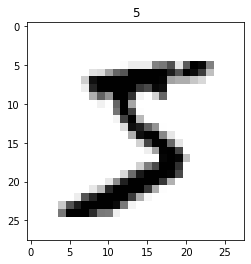

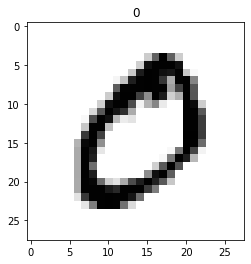

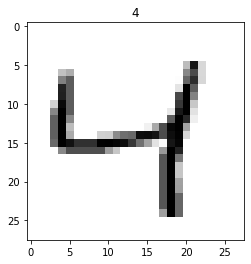

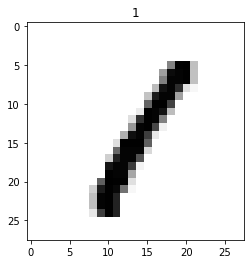

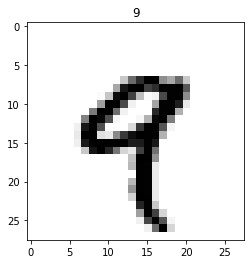

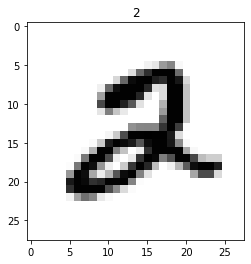

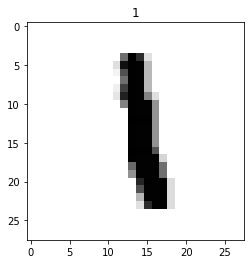

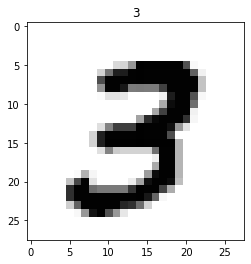

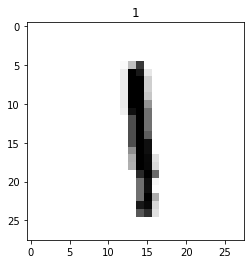

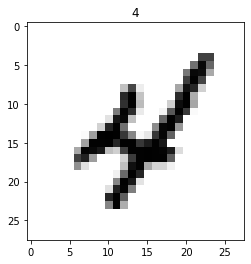

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

num       = 10
small_arr = X[:num]
small_y   = y[:num]

print(small_arr.shape)
for digit, label in zip(small_arr,small_y):
    digit_image = digit.reshape(28,28)
    plt.imshow(digit_image, cmap=mpl.cm.binary, interpolation="nearest")
    plt.title(str(label))
    plt.show()

In [5]:
test_size = 60000
X_train, X_test, y_train, y_test = X[:test_size], X[test_size:], y[:test_size], y[test_size:]
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(60000, 784) (10000, 784) (60000,) (10000,)


In [6]:
#this code made it worse
'''from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
pca = PCA(n_components=16, whiten=True)
scaler = RobustScaler()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
'''

'from sklearn.decomposition import PCA\nfrom sklearn.preprocessing import RobustScaler\npca = PCA(n_components=16, whiten=True)\nscaler = RobustScaler()\nX_train = pca.fit_transform(X_train)\nX_test = pca.transform(X_test)\nX_train = scaler.fit_transform(X_train)\nX_test = scaler.transform(X_test)\n'

In [7]:
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

sgd_clf = SVC( kernel = 'rbf', cache_size=200, random_state= 42)

#sgd_clf = SGDClassifier(random_state=42,loss='log')
sgd_clf.fit(X_train,y_train)

SVC(random_state=42)

In [8]:
print(sgd_clf.predict(X_train[:10]))
print("Percent correct: ", 100.0*sum(sgd_clf.predict(X_train) == y_train)/len(y_train))
print("Percent correct: ", 100.0*sum(sgd_clf.predict(X_test) == y_test)/len(y_test))

[5 0 4 1 9 2 1 3 1 4]
Percent correct:  98.99166666666666
Percent correct:  97.92


In [9]:
import pandas as pd
out = pd.DataFrame(sgd_clf.predict(X_test), columns = ["predictions"])


#outA.concat(test_data["Weight (lbs)"])
out.to_csv("mnist_test.csv")

In [10]:
#this prints the first 10 numbers in Mnist
for i, item in enumerate(y_test):
    print(item)
    if i == 10:
        break

7
2
1
0
4
1
4
9
5
9
0


In [11]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

some_digit = [X_train[1]]

print(sgd_clf.decision_function(some_digit))
print(sgd_clf.predict(some_digit))

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)
conf_matrix  = confusion_matrix(y_train,y_train_pred)
conf_matrix

[[ 9.31776763  0.69966542  8.26937495  3.82063539 -0.30671293  7.27141643
   3.80978873  1.72165536  6.0316466   3.83885601]]
[0]


array([[5863,    3,   10,    2,    4,    8,   14,    2,   13,    4],
       [   1, 6664,   26,    9,   10,    1,    3,   10,   10,    8],
       [  19,    9, 5811,   16,   26,    5,    8,   30,   28,    6],
       [   3,    9,   54, 5891,    2,   62,    1,   30,   61,   18],
       [   5,   11,   13,    0, 5712,    0,   20,    9,    4,   68],
       [  11,    6,   10,   57,   14, 5255,   35,    4,   17,   12],
       [  20,    8,    7,    0,   10,   32, 5831,    0,   10,    0],
       [   5,   21,   42,    6,   35,    2,    1, 6100,    7,   46],
       [   8,   29,   19,   38,   20,   39,   21,    9, 5646,   22],
       [  14,   11,    4,   31,   72,   16,    2,   59,   19, 5721]],
      dtype=int64)

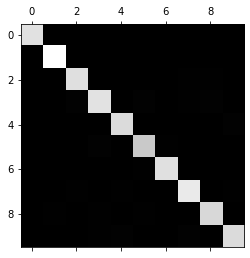

In [12]:
plt.matshow(conf_matrix,cmap=plt.cm.gray)
plt.show()

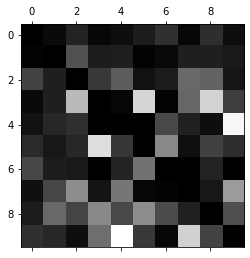

In [13]:
row_sums = conf_matrix.sum(axis=1,keepdims=True)
norm_conf_matrix = conf_matrix/row_sums
np.fill_diagonal(norm_conf_matrix,0.0)
plt.matshow(norm_conf_matrix,cmap=plt.cm.gray)
plt.show()